CREDIT CARD FRAUD DETECTION USING ML

In [ ]:
# importing the necessary libraries
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing and reading the file using pandas
ccf = pd.read_csv("creditcard.csv")

# observing the initial 5 rows of the dataset
ccf.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
# observing the dimension of dataset

ccf.shape

(5974, 31)

In [4]:
# properties of dataset

ccf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000
mean,2677.615501,-0.266159,0.285505,0.844231,0.104200,0.000709,0.194948,0.018324,-0.039006,0.396916,...,-0.043098,-0.161548,-0.036483,0.028960,0.089873,-0.040197,0.025234,0.006116,65.061811,0.000502
std,1765.025532,1.395405,1.208867,1.031448,1.442339,1.185900,1.365525,1.059870,1.304005,1.047749,...,0.883330,0.646380,0.373210,0.619810,0.407680,0.488284,0.364482,0.265131,192.490314,0.022407
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1162.250000,-1.015749,-0.280054,0.295701,-0.839417,-0.609206,-0.677720,-0.492968,-0.189736,-0.264280,...,-0.260507,-0.594625,-0.187108,-0.350226,-0.152744,-0.399334,-0.049681,-0.017776,4.450000,0.000000
50%,2537.000000,-0.420703,0.346083,0.882882,0.161767,-0.083983,-0.142606,0.041761,0.037831,0.360826,...,-0.111701,-0.177197,-0.046772,0.094946,0.106290,-0.079583,0.015976,0.019417,15.620000,0.000000
75%,3781.750000,1.115402,0.941548,1.504158,1.071412,0.441406,0.605784,0.566306,0.343067,0.961662,...,0.059809,0.273148,0.088154,0.435670,0.355157,0.245560,0.155281,0.082701,56.660000,0.000000
max,6645.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


In [5]:
# measuring specific columns as amount , time and class of data

ccf[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,5973.000000,5974.000000,5973.000000
mean,65.061811,2677.615501,0.000502
std,192.490314,1765.025532,0.022407
min,0.000000,0.000000,0.000000
25%,4.450000,1162.250000,0.000000
50%,15.620000,2537.000000,0.000000
75%,56.660000,3781.750000,0.000000
max,7712.430000,6645.000000,1.000000


In [6]:
# observing the exact total  number of columns of dataset
ccf.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# finding for any missing values present in dataset
ccf.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18        True
V19        True
V20        True
V21        True
V22        True
V23        True
V24        True
V25        True
V26        True
V27        True
V28        True
Amount     True
Class      True
dtype: bool

In [8]:
# observing the sum and percentage of null columns present inside of the dataset

null_coulmns = pd.DataFrame({'Columns':ccf.isna().sum().index,'No. Null values': ccf.isna().sum().values,'Percentage':ccf.isna().sum().values/ccf.shape[0]})

Percentage of total not fraud creditors

In [34]:
# initializing the total number of creditiors which are not fraud in terms of credit cards used
notfraud_count = 0
notfraud = ccf['Class']

for i in range(len(notfraud)):
  if notfraud[i]==0:
    notfraud_count = notfraud_count + 1

# displayig the percentage of not fraud creditors
notfraud_count
per_notfraud = (notfraud_count / len(notfraud))*100
print("percentage of total not fraud transaction in the dataset:", per_notfraud, "%")

percentage of total not fraud transaction in the dataset: 99.94978239035822 %


In [10]:
# observing the last 5 columns of dataset

ccf['Class'].tail(5)

5969    0.0
5970    0.0
5971    0.0
5972    0.0
5973    NaN
Name: Class, dtype: float64

Percentage of total fraud creditors

In [33]:
fraud_count = 0
fraud = ccf['Class']

for i in range(len(fraud)):
  if fraud[i]==0:
    fraud_count = fraud_count + 1

fraud_count
per_fraud = (fraud_count / len(fraud))*100
print("percentage of total not fraud transaction in the dataset:", per_fraud , "%")

percentage of total not fraud transaction in the dataset: 99.94978239035822 %


Percentage of total fraud transaction

In [32]:
fraud_count = 0

fraud=ccf['Class']
for i in range(len(fraud)):
  if fraud[i]==1:
    fraud_count = fraud_count + 1


fraud_count
per_fraud = (fraud_count / len(fraud))*100
print('percentage of total fraud transaction in the dataset:', per_fraud , "%")


percentage of total fraud transaction in the dataset: 0.05021760964178105 %


In [13]:
plot_data = pd.DataFrame()
plot_data['Fraud Transaction'] = fraud
plot_data['Genuine Transaction'] = notfraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
5969,0.0,0.0
5970,0.0,0.0
5971,0.0,0.0
5972,0.0,0.0


<Axes: xlabel='Class', ylabel='Count'>

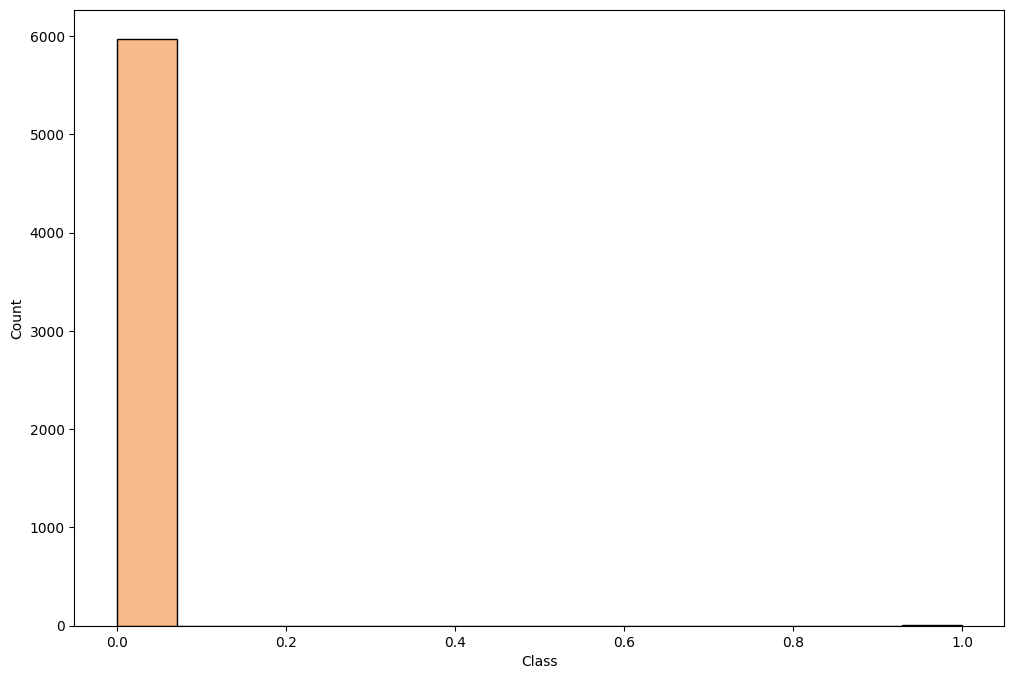

In [51]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(ccf , x = "Class" , color = "sandybrown")

Data vislualizing of first 12 individual columns of v1 to v12

<Axes: xlabel='V1', ylabel='Count'>

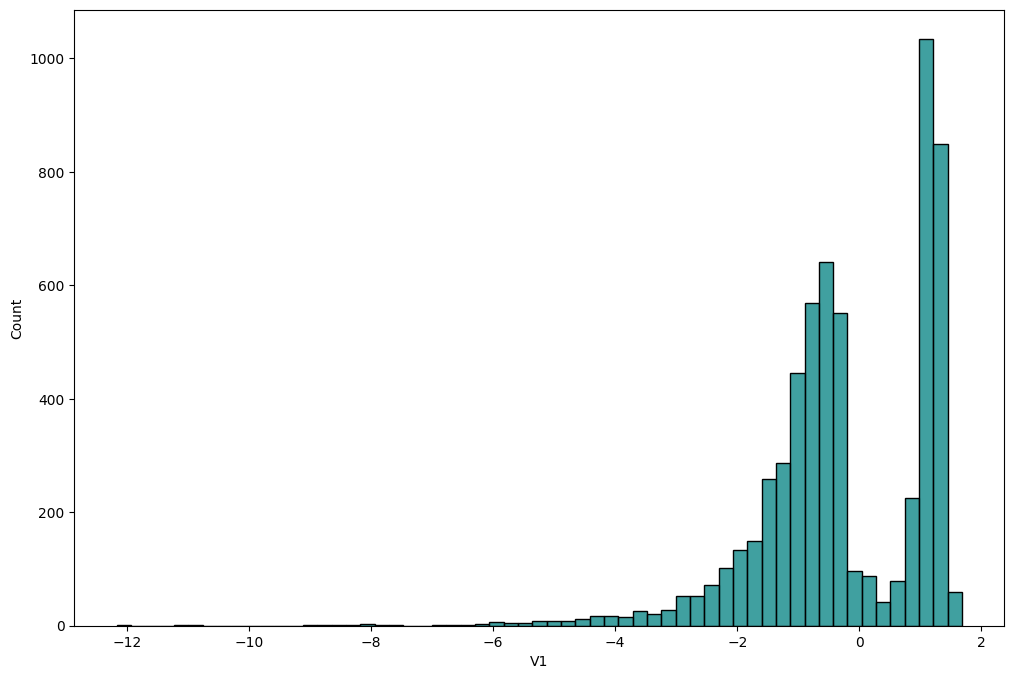

In [56]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V1" , color = "teal")

<Axes: xlabel='V2', ylabel='Count'>

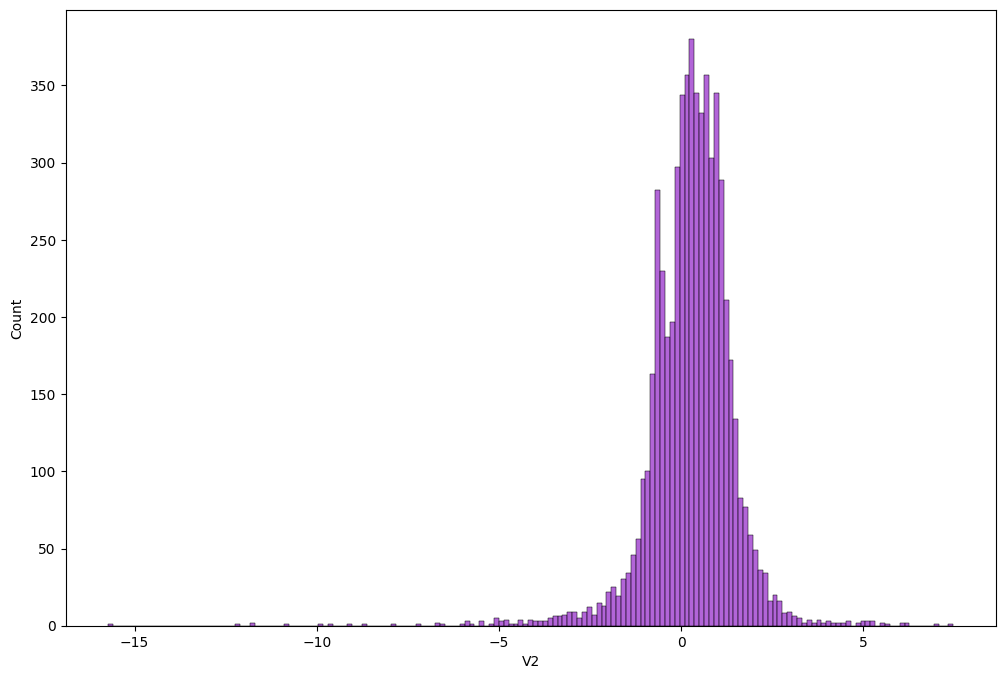

In [57]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V2" , color = "darkorchid")

<Axes: xlabel='V3', ylabel='Count'>

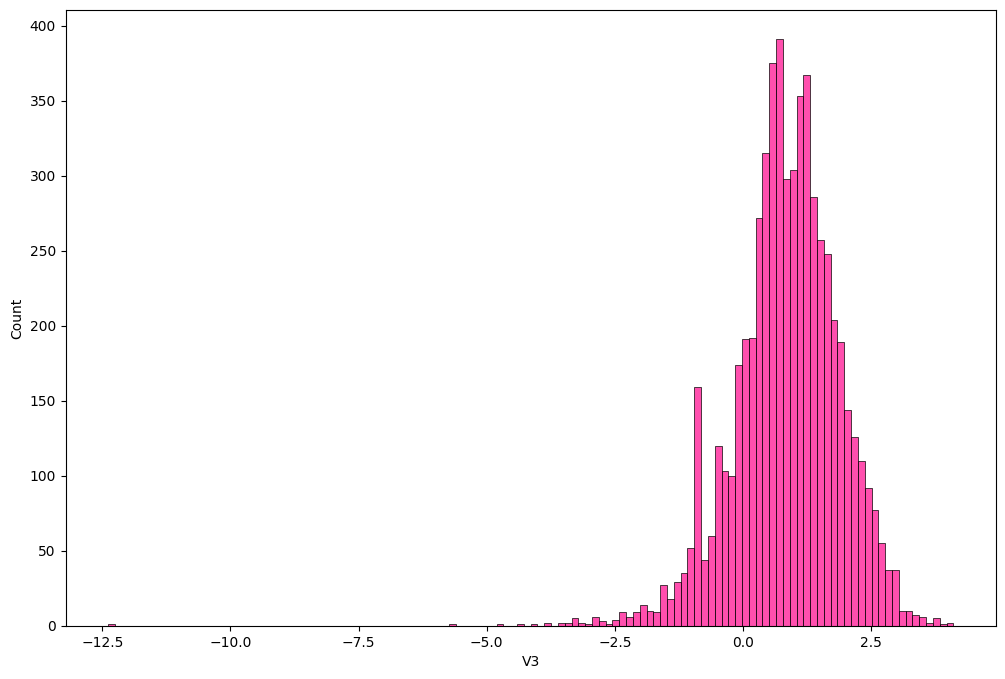

In [58]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V3" , color = "deeppink")

<Axes: xlabel='V4', ylabel='Count'>

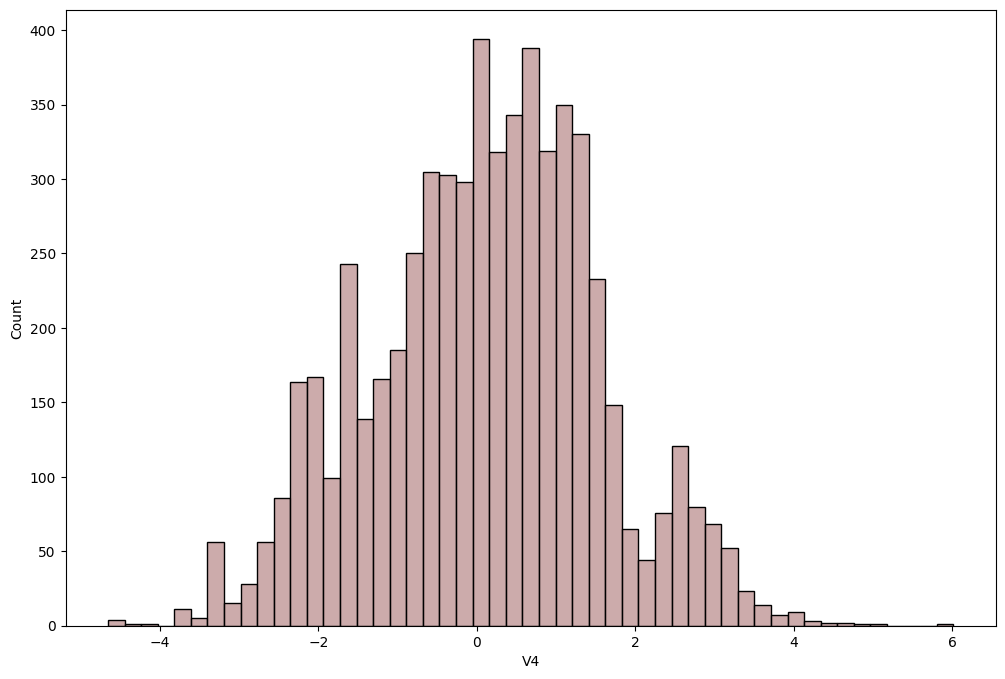

In [59]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V4" , color = "rosybrown")

<Axes: xlabel='V5', ylabel='Count'>

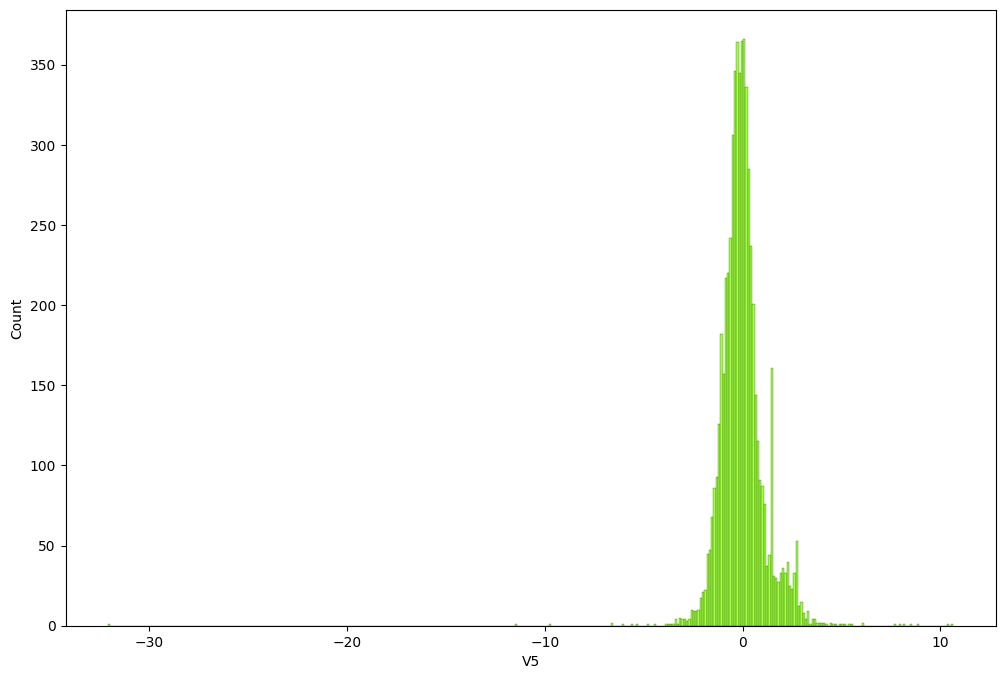

In [60]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V5" , color = "chartreuse")

<Axes: xlabel='V6', ylabel='Count'>

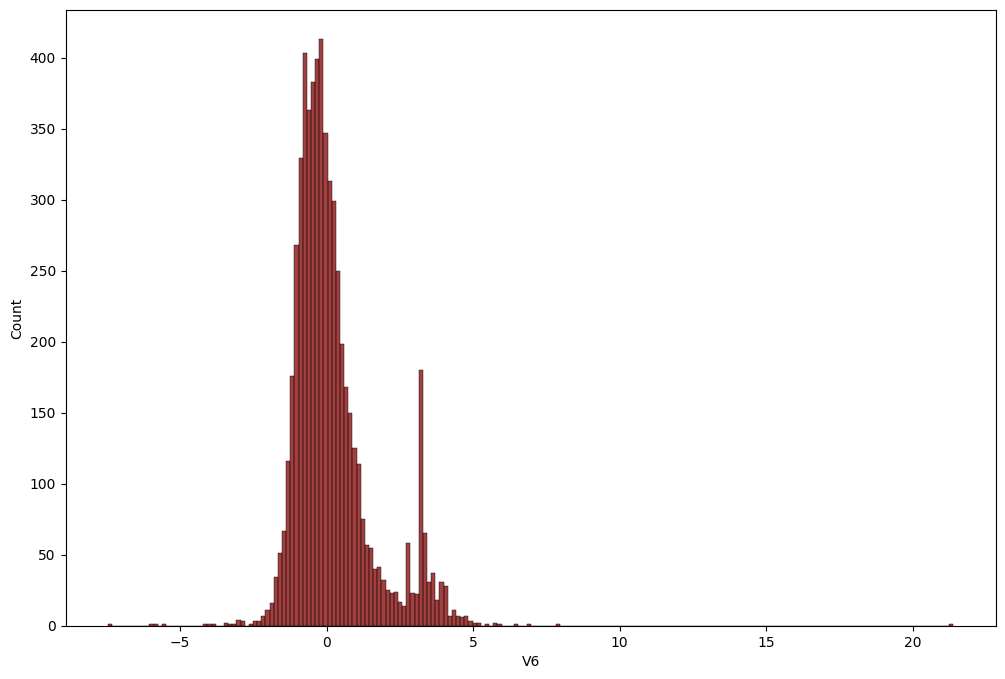

In [62]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V6" , color = "maroon")

<Axes: xlabel='V7', ylabel='Count'>

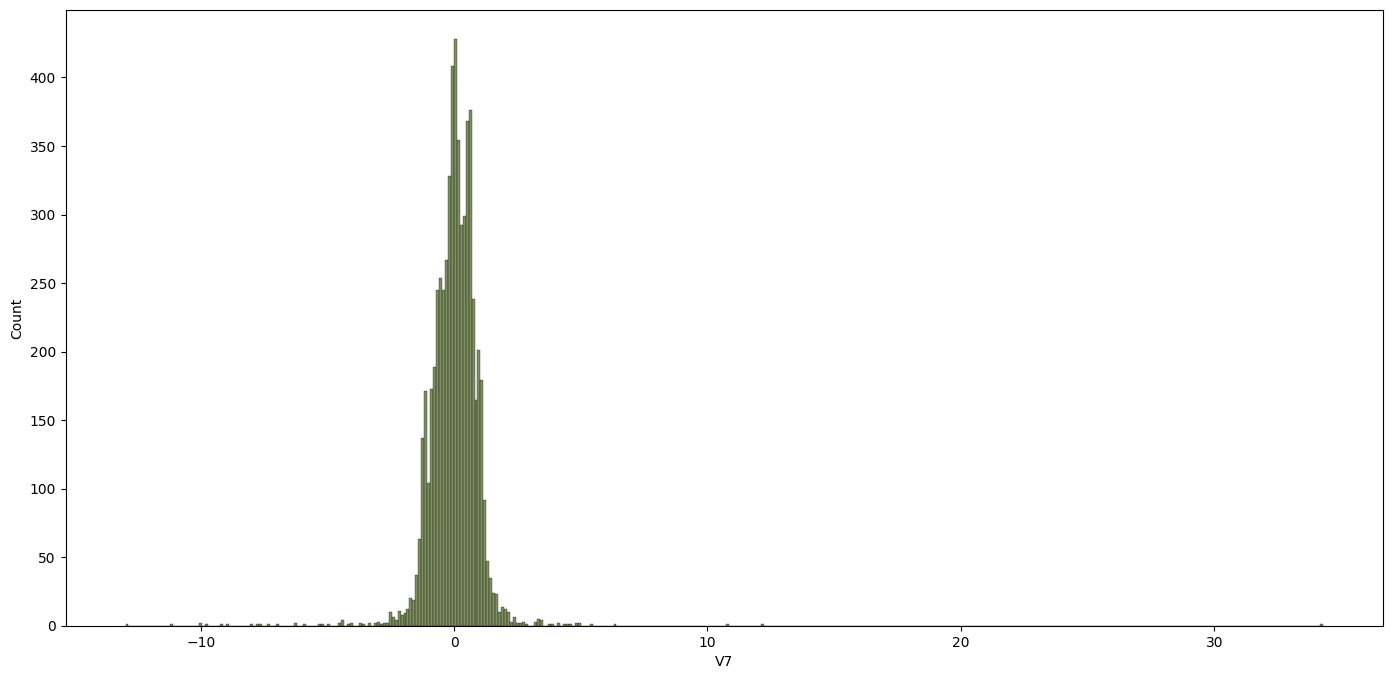

In [64]:
plt.figure(figsize=(17,8))
sns.histplot(ccf , x="V7" , color = "darkolivegreen")

<Axes: xlabel='V8', ylabel='Count'>

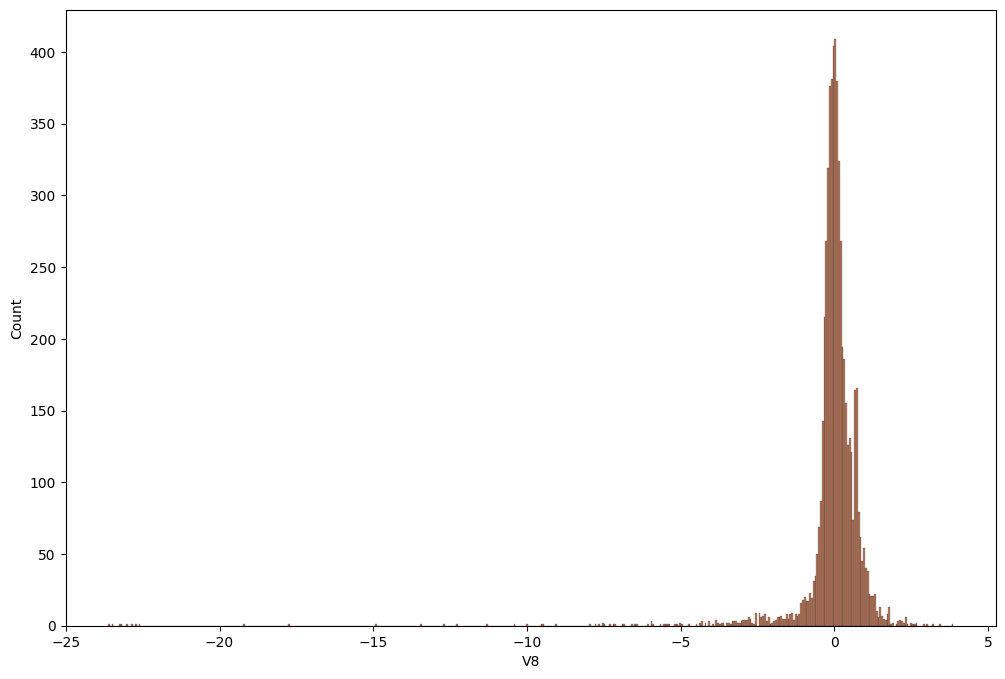

In [65]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V8" , color = "sienna")

<Axes: xlabel='V9', ylabel='Count'>

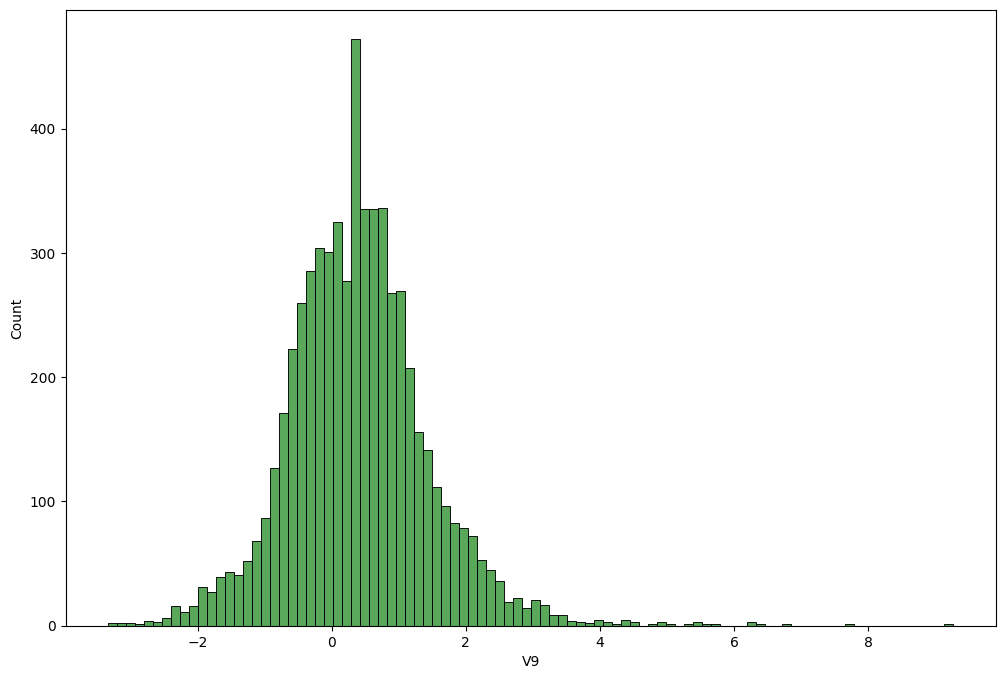

In [66]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V9" , color = "forestgreen")

<Axes: xlabel='V10', ylabel='Count'>

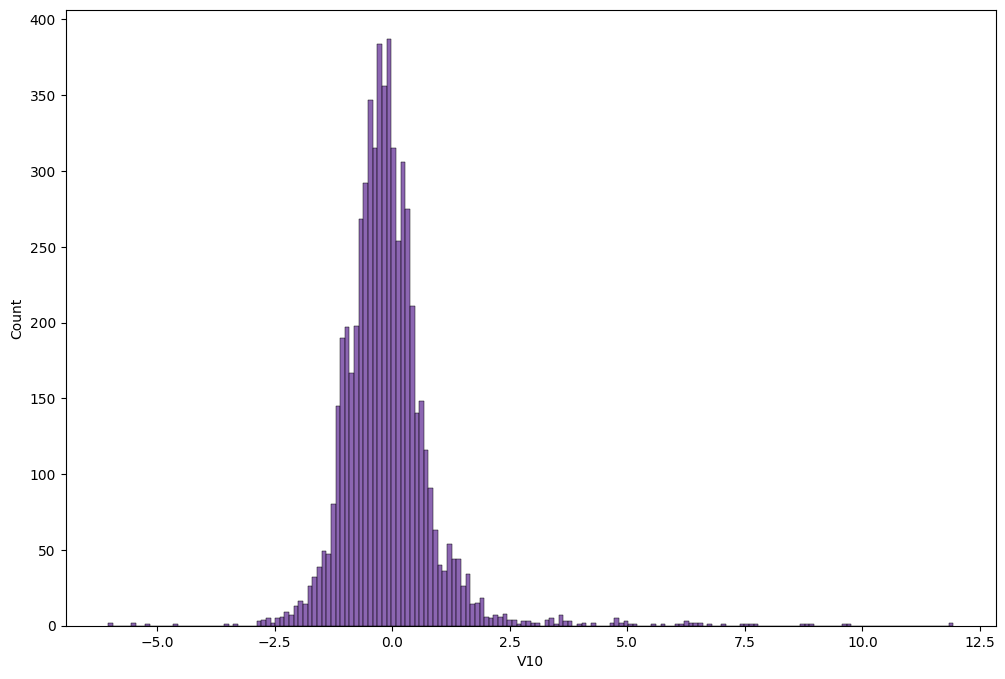

In [67]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V10" , color = "rebeccapurple")

<Axes: xlabel='V11', ylabel='Count'>

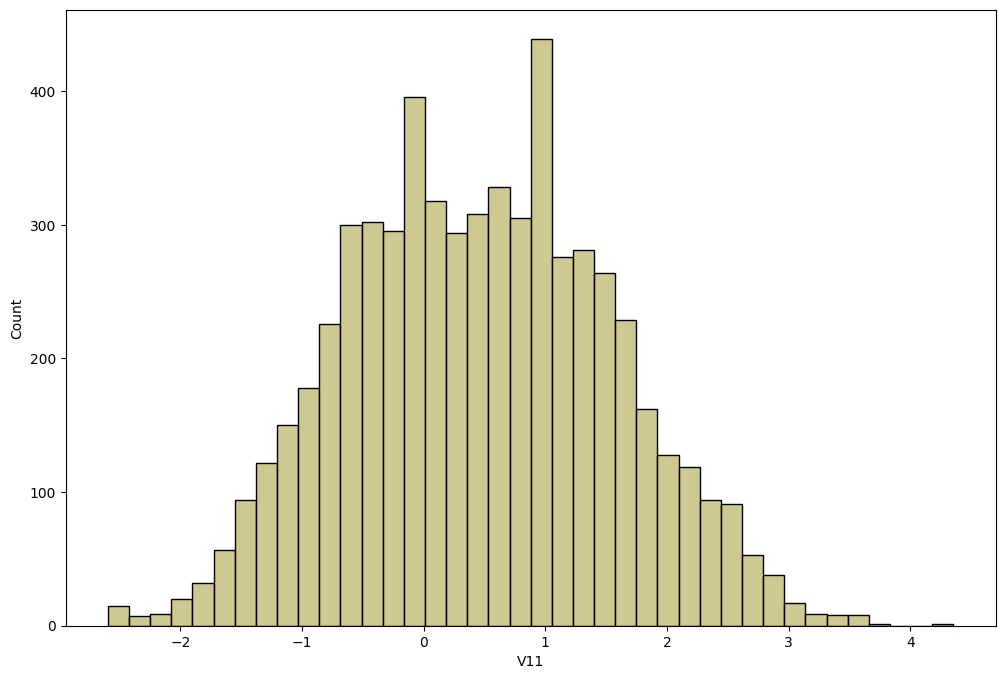

In [68]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V11" , color = "darkkhaki")

<Axes: xlabel='V12', ylabel='Count'>

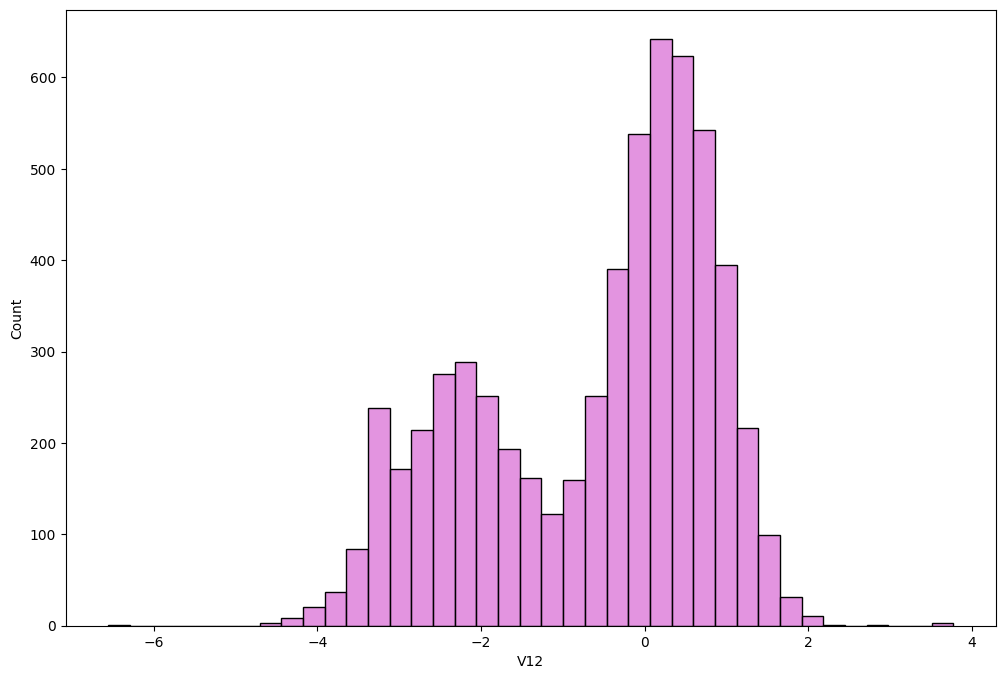

In [69]:
plt.figure(figsize=(12,8))
sns.histplot(ccf , x="V12" , color = "orchid")

<Axes: xlabel='Class', ylabel='Amount'>

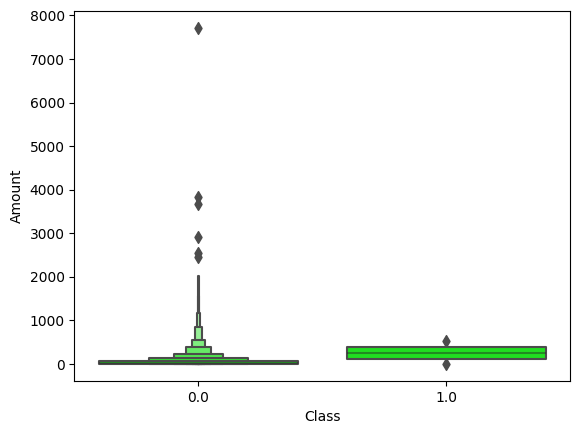

In [73]:
sns.boxenplot(ccf , x="Class" , y='Amount', color = 'lime')

<Axes: xlabel='Class', ylabel='Time'>

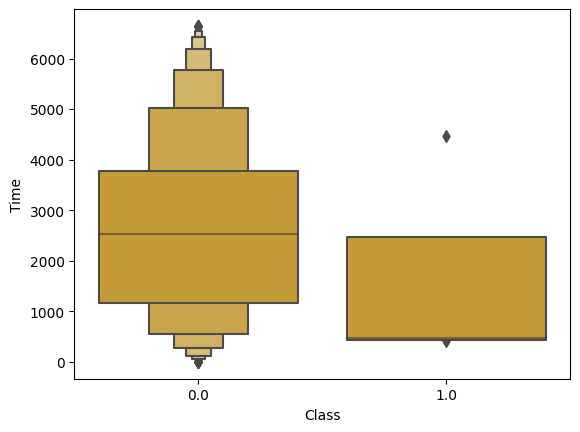

In [74]:
sns.boxenplot(ccf , x="Class" , y='Time', color = 'goldenrod')

<Axes: xlabel='Time', ylabel='Class'>

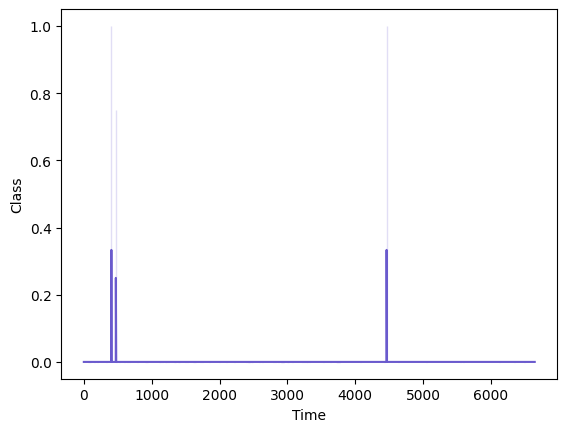

In [77]:
sns.lineplot(ccf, x="Time", y="Class", color="slateblue")

<Axes: title={'center': 'Bar plot for fraud vs genuine transactions'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

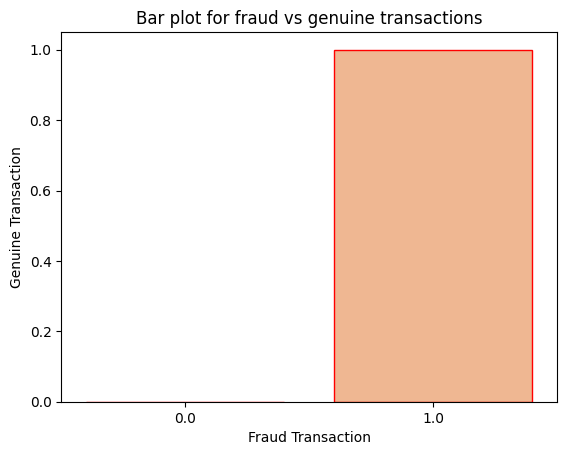

In [35]:
import seaborn as sns
plt.title("Bar plot for fraud vs genuine transactions")
sns.barplot(x= 'Fraud Transaction', y='Genuine Transaction', data= plot_data, palette = 'pastel', edgecolor='r')

Text(0.5, 1.0, 'Time vs Amount')

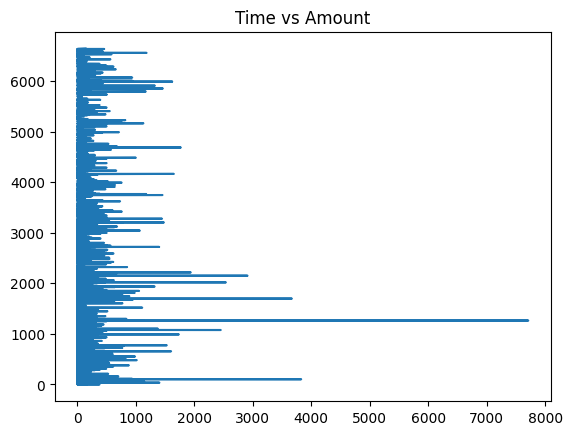

In [15]:
x = ccf['Amount']
y = ccf['Time']

plt.plot(x , y)

plt.title('Time vs Amount')

<ipython-input-16-f18419f24ac6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ccf['Amount'], color='purple');


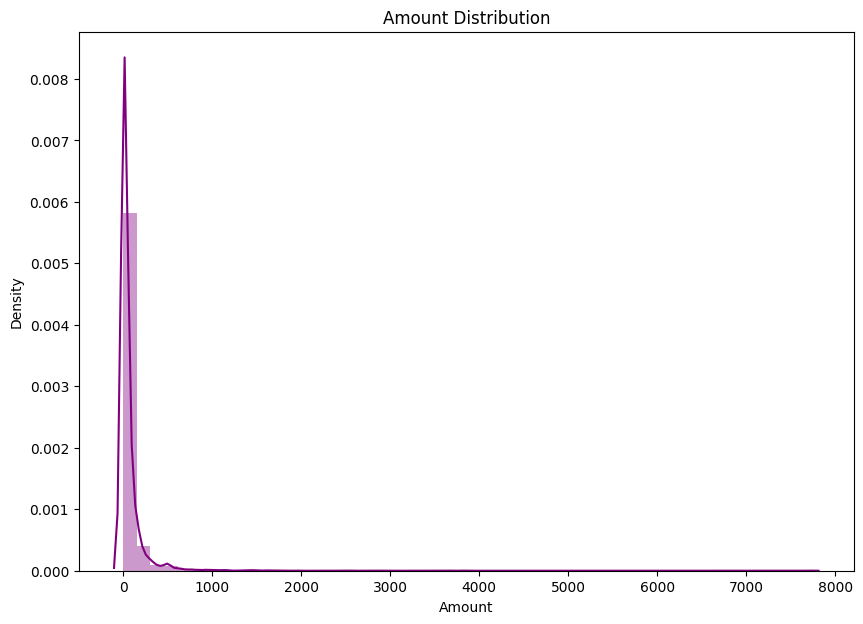

In [16]:
plt.figure(figsize=(10,7),)
plt.title('Amount Distribution')

sns.distplot(ccf['Amount'], color='purple');

Outliers detection / anomaly

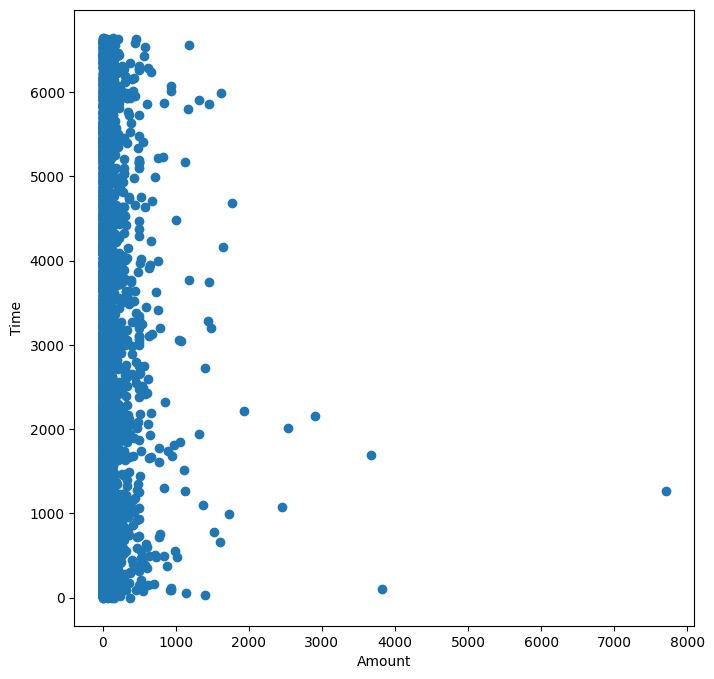

In [17]:
fig , ax = plt.subplots(figsize=(8,8))
ax.scatter(ccf['Amount'], ccf['Time'])

ax.set_xlabel('Amount')
ax.set_ylabel('Time')

plt.show()

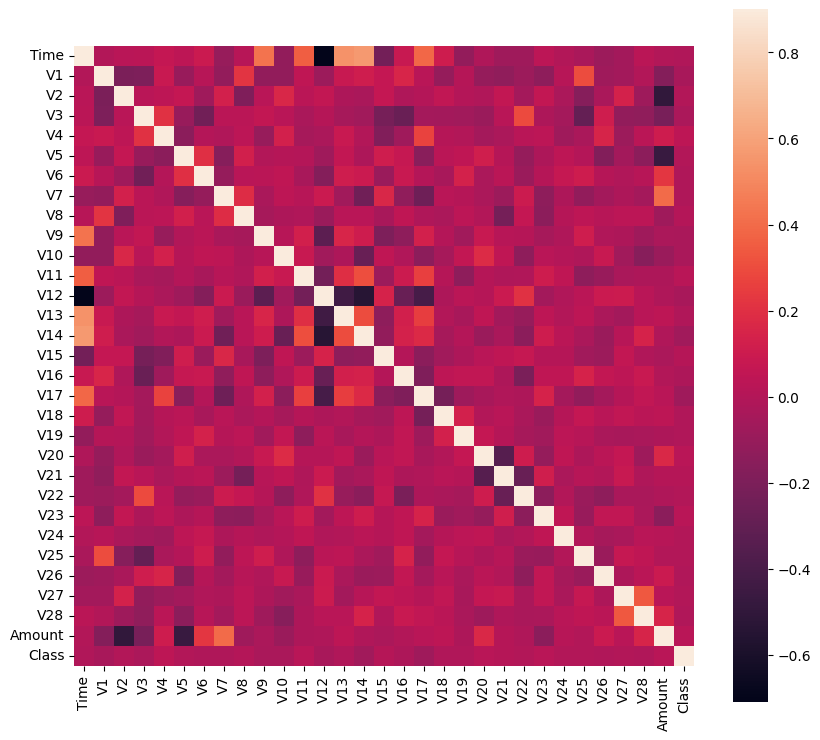

In [36]:
# correlation matrix
from sklearn.metrics import confusion_matrix
correlation_metrics = ccf.corr()

fig = plt.figure(figsize = (10,9))

sns.heatmap(correlation_metrics, vmax = .9, square = True)

plt.show()

In [23]:
#ccf.replace(np. nan,0)
# replacing NAN values in dataset to 0 because logistic regression model does not fit well with missing values of data
ccf = ccf.fillna(0)

Training the Model

In [37]:
# modeling the data for LOGISTIC REGRESSION model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = ccf.drop(['Class'], axis = 1)
y = ccf['Class']

xtrain , xtest , ytrain , ytest = train_test_split( x , y , test_size = 0.2, random_state = 42)

logisticreg = LogisticRegression()
logisticreg.fit(xtrain , ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = logisticreg.predict(xtest)

accuracy = logisticreg.score(xtest , ytest)

In [39]:
# displaying the confusion matrix dimensions and parameter values
from sklearn import metrics
cm = metrics.confusion_matrix(ytest , y_pred)
print(cm)

[[1194    0]
 [   1    0]]


In [30]:
# calculating the accuracy
print("accuracy score of the LR model is:", accuracy*100, '%')

accuracy score of the LR model is: 99.9163179916318 %


In [41]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1194
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Roc Curve evaluation


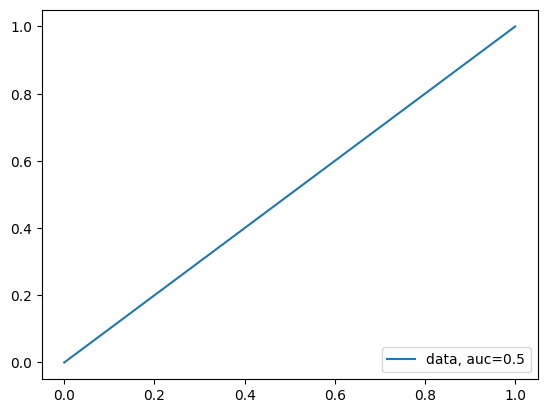

In [44]:
print('Roc Curve evaluation')
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred)
auc = metrics.roc_auc_score(ytest, y_pred)
plt.plot(fpr,tpr,label='data, auc='+str(auc))
plt.legend(loc=4)
plt.show()